In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("Data/ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.shape

(294478, 5)

In [4]:
df['converted'].mean()

0.11965919355605512

In [5]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [6]:
df.query(
    'group == "treatment" and landing_page != "new_page"'
)

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


In [7]:
df.query(
    'group == "control" and landing_page != "old_page"'
)

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [9]:
df2t = df.query(
    'group == "treatment" and landing_page == "new_page"'
)
df2c = df.query(
    'group == "control" and landing_page == "old_page"'
)

In [10]:
df2 = df2t.merge(df2c, how='outer')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [11]:
df2.shape

(290585, 5)

In [12]:
df2.describe()

,user_id,converted
count,290585.000000,290585.000000
mean,788004.825246,0.119597
std,91224.582639,0.324490
min,630000.000000,0.000000
25%,709035.000000,0.000000
50%,787995.000000,0.000000
75%,866956.000000,0.000000
max,945999.000000,1.000000


In [13]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [14]:
sum(df2['user_id'].duplicated())

1

In [15]:
df2[df2['user_id'].duplicated(keep='first')]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
df2 = df2[~df2['user_id'].duplicated(keep='first')]

In [17]:
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

In [18]:
df2.converted.mean() * 100

11.959708724499627

In [19]:
df2_control = df2.query('group == "control"')
df2_treatment = df2.query('group == "treatment"')

In [20]:
df2_control.converted.mean() * 100

12.03863045004612

In [21]:
df2_treatment.converted.mean() * 100

11.880806551510565

In [22]:
df2['converted'].mean()

0.11959708724499628

In [23]:
1 - df2['converted'].mean()

0.8804029127550037

In [24]:
len(df2_treatment)

145310

In [25]:
new_page_converted = np.random.choice(
    [1, 0],
    size=len(df2_treatment),
    p=[df2.converted.mean(), (1 - df2.converted.mean())]
)

In [26]:
new_page_converted

array([0, 0, 1, ..., 0, 0, 0])

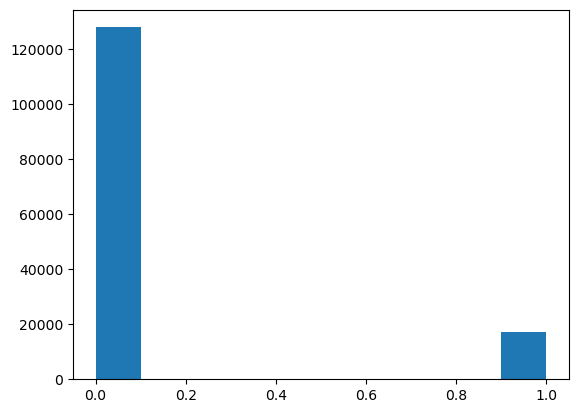

In [27]:
plt.hist(new_page_converted);

In [28]:
old_page_converted = np.random.choice(
    [1, 0],
    size=len(df2_control),
    p=[df2.converted.mean(), (1 - df2.converted.mean())]
)

In [29]:
old_page_converted

array([0, 0, 0, ..., 1, 0, 0])

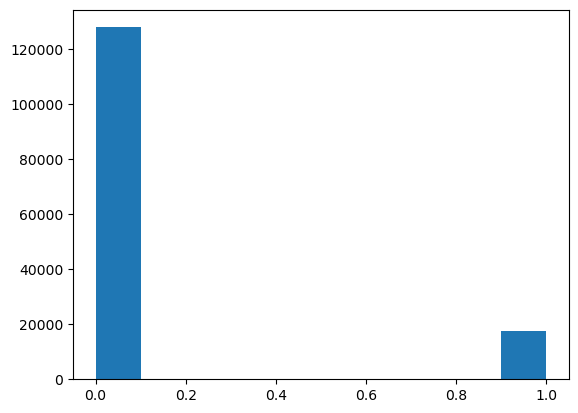

In [30]:
plt.hist(old_page_converted);

In [31]:
new_page_converted = np.random.binomial(
    len(df2_treatment),
    df2.converted.mean(),
    10000
) / len(df2_treatment)

old_page_converted = np.random.binomial(
    len(df2_control),
    df2.converted.mean(),
    10000
) / len(df2_control)

In [32]:
old_page_converted

array([0.11891323, 0.11772237, 0.11814227, ..., 0.12050332, 0.11885127,
       0.12044137])

In [33]:
p_diffs = new_page_converted - old_page_converted

In [34]:
p_diffs.mean()

-3.1365063129877094e-06

In [35]:
p_diffs

array([-0.00026344,  0.0020285 ,  0.00061762, ...,  0.00021101,
        0.00063809, -0.00039458])

In [36]:
ab_data_diff = df2_treatment['converted'].mean() - df2_control['converted'].mean()

In [37]:
ab_data_diff

-0.0015782389853555567

In [38]:
(p_diffs > ab_data_diff).mean() * 100

90.23

In [39]:
(p_diffs < ab_data_diff).mean() * 100   # p-value

9.77

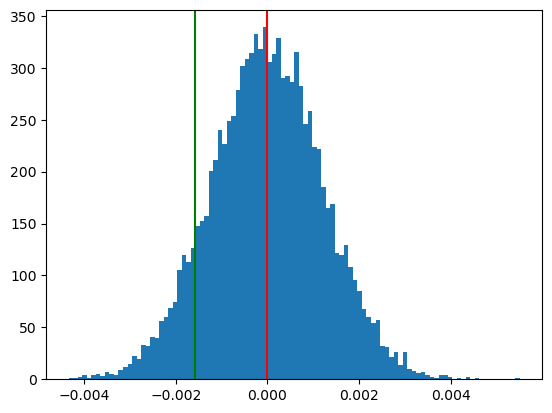

In [40]:
plt.hist(p_diffs, bins=100)
low = ab_data_diff
high = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=high, color='r')